In [1]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from loaddatastructs import *
from helperfuncs import *
from plottingfuncs import *


In [2]:
matplotlib.rcParams.update({'font.size': 13})

In [2]:
Archive.archive_path = '/data/nriemer/d/sf20/les_output/wrf-partmc'
#Archive.addScenario(scenario_name='uniform-basecase', slurm_id=1950592)
#Archive.addScenario(scenario_name='point-source-10x10', slurm_id=1951163)
#Archive.addScenario(scenario_name='point-source-10x10-tchem60', slurm_id=1953691)

# 6 hr simulations
Archive.addScenario(scenario_name='uniform-basecase', slurm_id=1984671)
Archive.addScenario(scenario_name='point-source-1x1', slurm_id=1984672)

Latent heat flux $\overline{w'\theta'}$: per the readme, "A sign of well-established
turbulence is that the total (i.e., the resolved-scale plus the
subgrid-scale) heat flux profile should decrease linearly with height
within the CBL."

In [9]:
#data = aerodata_dict['basecase']['aerodata']
data = Archive.aero_data['uniform-basecase']
hflx = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['T'][t, z, :, :] # perturbation potential temperature (relative to 300 K)
        B_data = data['W'][t, z, :, :] # vertical velocity

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        hflx[t, z] = (A_prime*B_prime).mean(axis=(0,1))

Text(0.5, 1.0, "$\\overline{w'\\theta}'$")

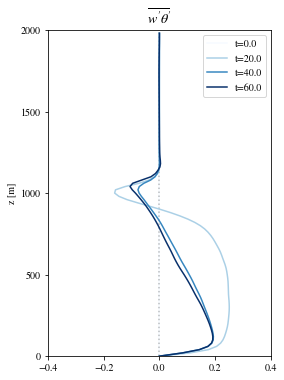

In [11]:
tmax=6
colors = plt.cm.Blues(np.linspace(0, 1, tmax+1))
fig, ax = plt.subplots(1,1, figsize=(4, 6))
ax.axvline(x=0, c='k', ls=':', alpha=1)
for t in range(tmax+1)[::2]:
    ax.plot(hflx[t, :], np.arange(100), label=f't={Archive.historydelta_m*t}', c=colors[t])
ax.legend()
ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2000, 5, dtype=int))
ax.set_ylim(0, Archive.n_levels)
ax.set_xlim(-.4, .4)
ax.set_ylabel('z [m]')
ax.set_title("$\\overline{w'\\theta}'$", fontsize=14)

TKE

Text(0.5, 1.0, 'TKE')

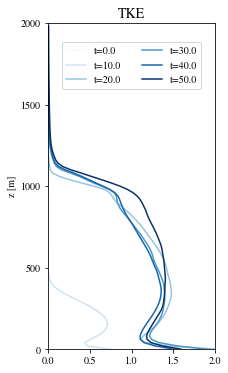

In [14]:
data = Archive.aero_data['uniform-basecase']

fig, ax = plt.subplots(1,1, figsize=(3, 6))
colors = plt.cm.Blues(np.linspace(0, 1, 6))
for t in np.arange(0, 6, 1):
    sigma_u = data['U'][t, :, :, :].std(axis=(1,2))
    sigma_v = data['V'][t, :, :, :].std(axis=(1,2))
    sigma_w = data['W'][t, :, :, :].std(axis=(1,2))[:-1]

    specific_tke = (1/2)*(sigma_u**2 + sigma_v**2 + sigma_w**2) 
    e = np.sqrt(2*specific_tke)
    
    ax.plot(specific_tke, np.arange(100), label=f't={Archive.historydelta_m*t}', c=colors[t])
ax.set_xlim(0, 2)
ax.legend(loc='center', ncol=2, bbox_to_anchor=(.5, .87))
ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2000, 5, dtype=int))
ax.set_ylim(0, Archive.n_levels)
ax.set_ylabel('z [m]')
ax.set_title("TKE", fontsize=14)

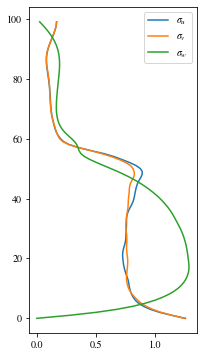

In [11]:
fig, ax = plt.subplots(1,1, figsize=(3, 6))
ax.plot(sigma_u,np.arange(100), label='$\sigma_u$')
ax.plot(sigma_v,np.arange(100), label='$\sigma_v$')
ax.plot(sigma_w,np.arange(100), label='$\sigma_w$')
ax.legend()

Segregation intensity $I_s$

In [ ]:
data = Archive.aero_data['uniform-basecase']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['pmc_NO3'][t, z, :, :]
        B_data = data['pmc_SO4'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.5, vmax=.5, cmap='coolwarm')

In [ ]:
data = Archive.aero_data['point-source-10x10']

Is = np.zeros((24, 100))

for t in range(24):
    for z in range(100):
        A_data = data['pmc_NO3'][t, z, :, :]
        B_data = data['pmc_SO4'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.5, vmax=.5, cmap='coolwarm')

In [ ]:
scenario = 'point-source-10x10-tchem60'
variable = 'so2'
nsh_array = calculateNSHTimeSlice(scenario, variable)


In [ ]:
data = Archive.aero_data['point-source-10x10-tchem60']

Is = np.zeros((25, 100))

for t in range(25):
    for z in range(100):
        A_data = data['so2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.5, vmax=.5, cmap='coolwarm')

In [ ]:
plt.pcolormesh(nsh_array.T)
plt.colorbar()

In [ ]:
nsh_arr_flat = nsh_array.flatten()
Is_flat = Is.flatten()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(nsh_arr_flat, Is_flat, s=7)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_ylabel('$I_s$', fontsize=16)
ax.set_xlabel('$SH_{atmos}}$',fontsize=16)
ax.set_title('$I_s$ (OH & SO$_2$) vs. $SH_{atmos}$ (SO$_2$)', fontsize=18)
plt.savefig(f'SegIntens_vs_SH_SO2.pdf', format='pdf', bbox_inches='tight')

In [ ]:
scenario = 'point-source-10x10'
variable = 'no2'
nsh_array = calculateNSHTimeSlice(scenario, variable)

In [ ]:
data = Archive.aero_data['point-source-10x10']

Is = np.zeros((25, 100))

for t in range(25):
    for z in range(100):
        A_data = data['no2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)


In [ ]:
nsh_arr_flat = nsh_array.flatten()
Is_flat = Is.flatten()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(nsh_arr_flat, Is_flat, s=7)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_ylabel('$I_s$', fontsize=16)
ax.set_xlabel('$SH_{atmos}}$',fontsize=16)
ax.set_title('$I_s$ (OH & NO$_2$) vs. $SH_{atmos}$ (NO$_2$)', fontsize=18)
plt.savefig(f'SegIntens_vs_SH_NO2.pdf', format='pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
c = ax.pcolormesh(1000*basecase_data['so2'][16, 25, :, :])
plt.colorbar(c, ax=ax)

In [ ]:
data = Archive.aero_data['point-source-10x10-tchem60']
fig, ax = plt.subplots(1, 1, figsize=(7,6))
#vmin = 0.1
#vmax=12
c = ax.pcolormesh(1000*data['oh'][24, 25, :, :], )#vmin=0, vmax=12)
#norm=mplcolors.LogNorm(vmin, vmax))
plt.colorbar(c, ax=ax)

In [ ]:
data = Archive.aero_data['uniform-basecase']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['no2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.2, vmax=.2, cmap='coolwarm')

In [ ]:
data = Archive.aero_data['point-source-10x10']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['no2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.2, vmax=.2, cmap='coolwarm')

In [ ]:
data = aerodata_dict['basecase']['aerodata']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['so2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.2, vmax=.2, cmap='coolwarm')

In [ ]:
data = Archive.aero_data['point-source-10x10']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['so2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.2, vmax=.2, cmap='coolwarm')

In [ ]:
fig, ax  = plt.subplots(1,1, figsize=(8,5.5))

variable = 'ccn_006' #'TOT_COAGULATION_NUM_CONC'
scenarios = [
             'basecase', 
             'point-source-10x10', 
             'point-source-10x10-tchem60'
             ]
mixingratio = True
zlevel = 25

for scenario in scenarios:
    times = np.arange(n_times)
    varmean_array = np.zeros((n_times))
    varstd_array = np.zeros((n_times))
    for itime in times:
        if mixingratio:
            inverse_airdens = aerodata_dict[scenario]['aerodata']['ALT'][itime, zlevel, :, :]
            level_array = inverse_airdens*aerodata_dict[scenario]['aerodata'][variable][itime, zlevel, :, :]
        else:
            level_array = aerodata_dict[scenario]['aerodata'][variable][itime, zlevel, :, :]
        if variable in gas_vars:
            level_array = 1000*level_array
            if variable == 'oh':
                level_array = 1000*level_array
        varmean_array[itime] = level_array.mean()
        varstd_array[itime] = level_array.std()
        

    ax.plot(times, varmean_array, label = scenario)
    ax.fill_between(times, varmean_array-varstd_array, varmean_array+varstd_array, alpha=.3)

if mixingratio:
    var_units = 'Mixing Ratio'
else:
    var_units = 'Concentration'

#cbar = fig.colorbar(cs, label=f'{variable} {var_units}')
ax.legend(loc='upper left')
ax.set_xlabel('Time (mins)', fontsize=12)
ax.set_ylabel(f'{var_units}', fontsize=12)
ax.set_xticks(np.linspace(0, n_times-1, 13))
ax.set_xticklabels(5*np.linspace(0, n_times-1, 13))
#ax.set_yticks(np.arange(0, n_levels+1, 25))
#ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
#ax.set_yscale('log')
ax.set_title(f'{variable}')
plt.suptitle(f'Z-level: {zlevel}')
plt.tight_layout()


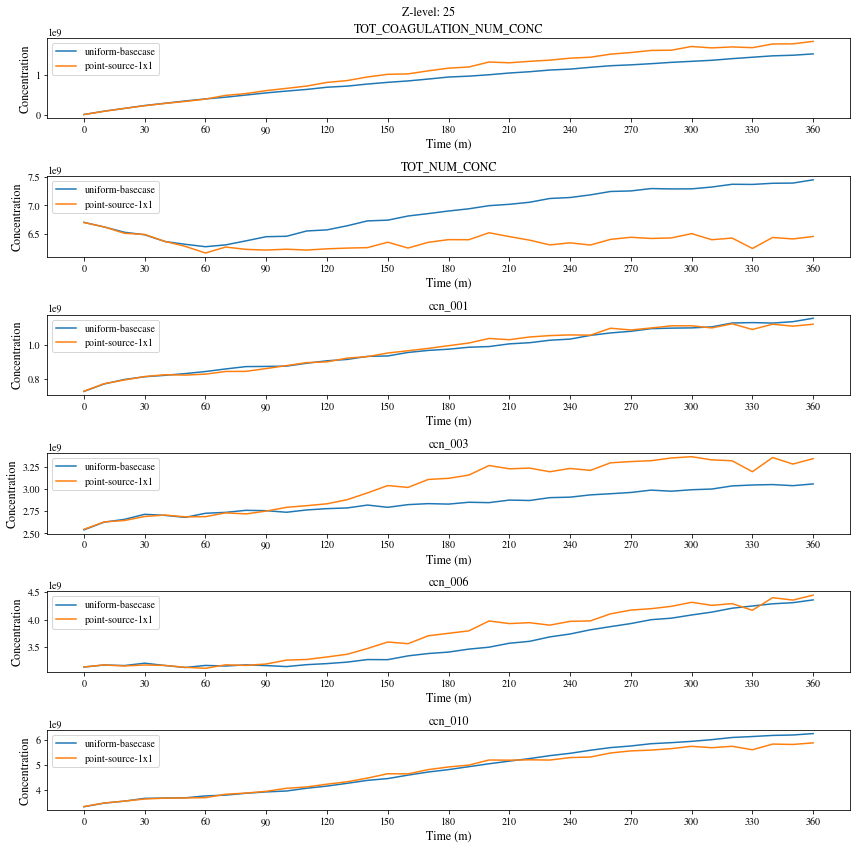

In [12]:
scenarios = [
             'uniform-basecase', 
             'point-source-1x1'
             #'point-source-10x10', 
             #'point-source-10x10-tchem60'
             ]
variables = ['TOT_COAGULATION_NUM_CONC', 'TOT_NUM_CONC',
'ccn_001', 'ccn_003', 'ccn_006', 'ccn_010']
mixingratio = False
zlevel = 25
plotScenariosVarsLevelConc(scenarios, variables, zlevel, mixingratio,
                           #xtick_delta_t=1, xtick_units='h')
                            )

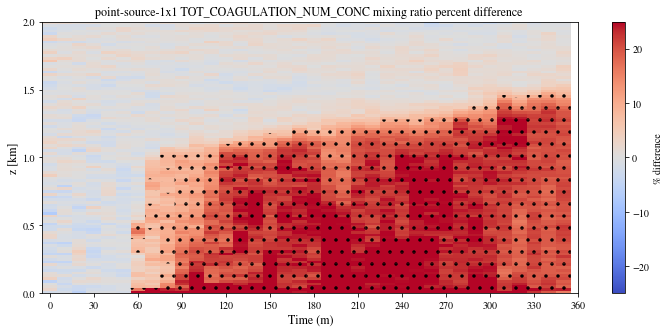

In [3]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-25, vmax=25, skip_t0=True,
                   mixingratio=True, plot_significance=True)

In [ ]:
variable = 'TOT_NUM_CONC'
scenario = 'point-source-10x10'
plotVarPercentDiff(scenario, variable, vmin=-5, vmax=5, 
                   mixingratio=True)

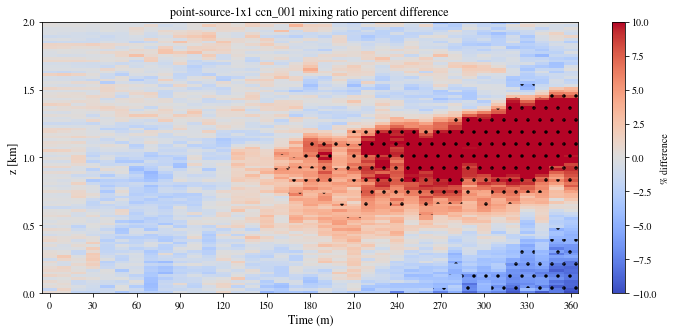

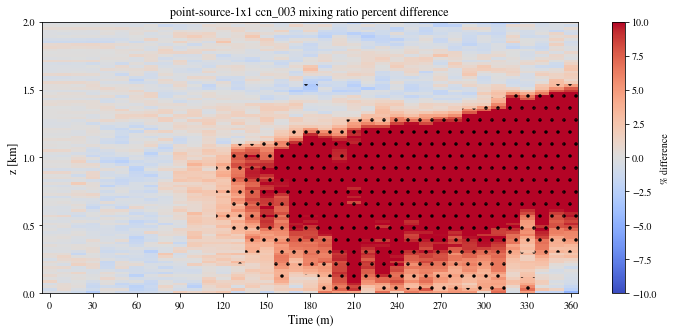

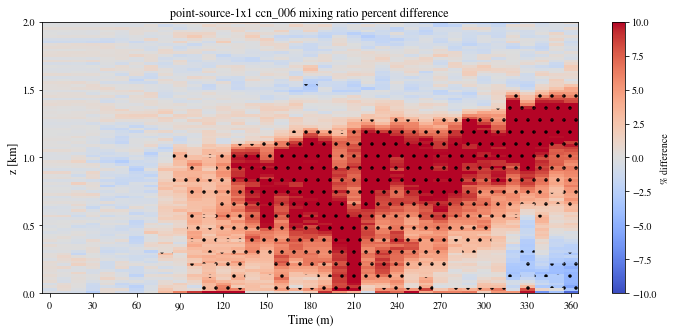

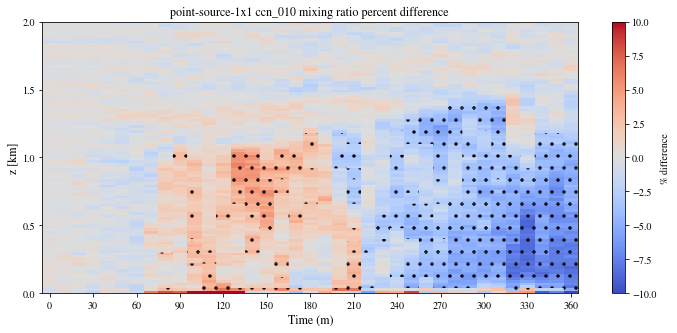

In [14]:
#scenario = 'point-source-10x10'
scenario = 'point-source-1x1'

variable = 'ccn_001'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True, 
                   #xtick_units='h', xtick_delta_t=1
                   )

variable = 'ccn_003'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True)

variable = 'ccn_006'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True)

variable = 'ccn_010'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True)

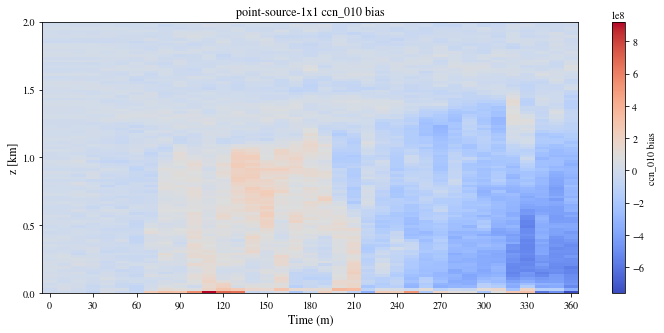

In [15]:
plotVarBias('point-source-1x1', 'ccn_010')

In [ ]:
variable = 'ccn_001'
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True)

variable = 'ccn_003'
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True)    

variable = 'ccn_006'
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True)

variable = 'ccn_010'
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True)

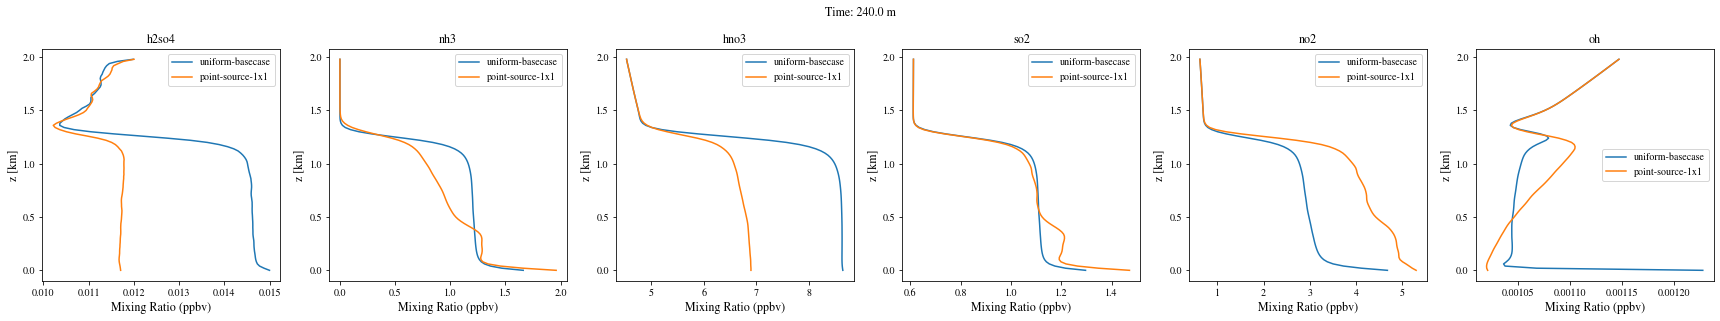

In [17]:
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'point-source-1x1'#'point-source-10x10', 'point-source-10x10-tchem60', 
                                            ], variables=['h2so4', 'nh3', 'hno3', 'so2', 'no2', 'oh'], time=24, delta_t=5)

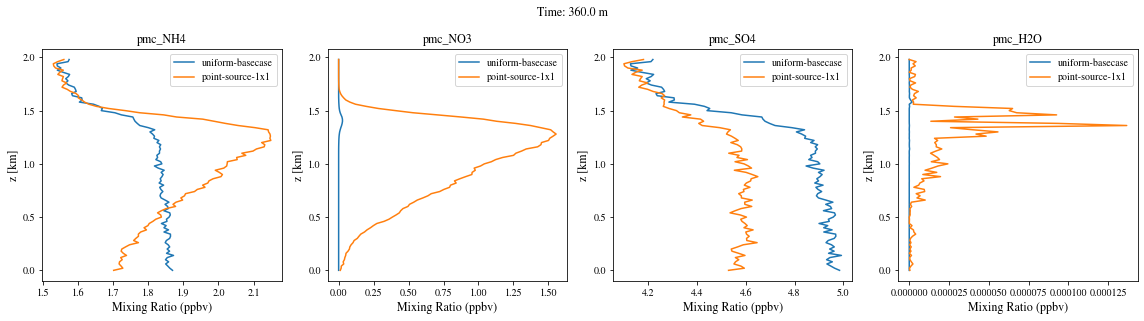

In [18]:
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'point-source-1x1'#'point-source-10x10','point-source-10x10-tchem60', 
                                            ], variables=['pmc_NH4', 'pmc_NO3', 'pmc_SO4', 'pmc_H2O',
                                                                                          #'pmc_ARO1'
                                                                                          ], 
                                 time=36, delta_t=5)

In [ ]:
plotZT(scenario='uniform-basecase', variable='pmc_NO3', vmin=1e-15, vmax=1e-9, lognorm=True,
       xtick_delta_t=1, xtick_units='h')

In [ ]:
plotZT(scenario='point-source-1x1', variable='pmc_NO3', vmin=1e-15, vmax=1e-9, lognorm=True)

In [ ]:
plotZT(scenario='point-source-10x10-tchem60', variable='pmc_NO3', vmin=1e-15, vmax=1e-10, lognorm=True)

In [ ]:
plotZT(scenario='uniform-basecase', variable='pmc_SO4', vmin=3.2e-9, vmax=4.1e-9)

In [ ]:
plotZT(scenario='point-source-1x1', variable='pmc_SO4',vmin=3.2e-9, vmax=4.1e-9)

In [ ]:
plotZT(scenario='basecase', variable='pmc_NH4', vmin=1.2e-9, vmax=1.55e-9)

In [ ]:
plotZT(scenario='point-source-10x10', variable='pmc_NH4',vmin=1.2e-9, vmax=1.55e-9)

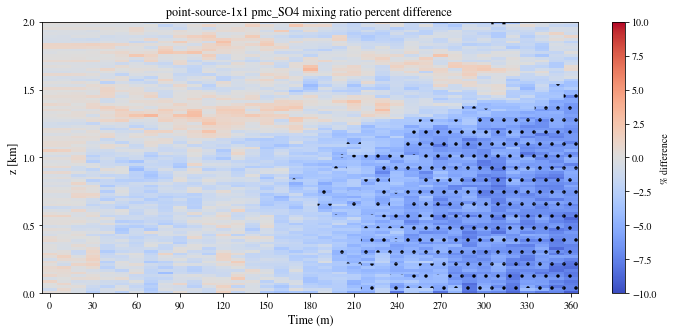

In [30]:
variable = 'pmc_SO4'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True)

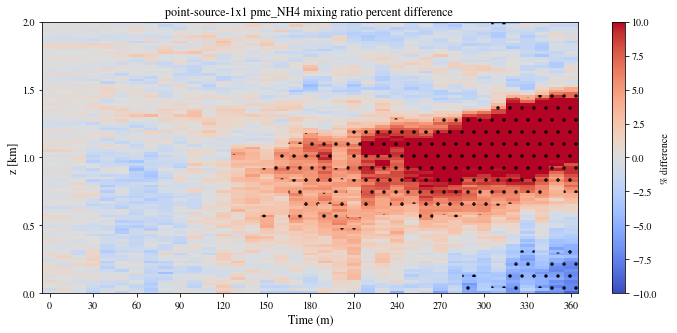

In [29]:
variable = 'pmc_NH4'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True)

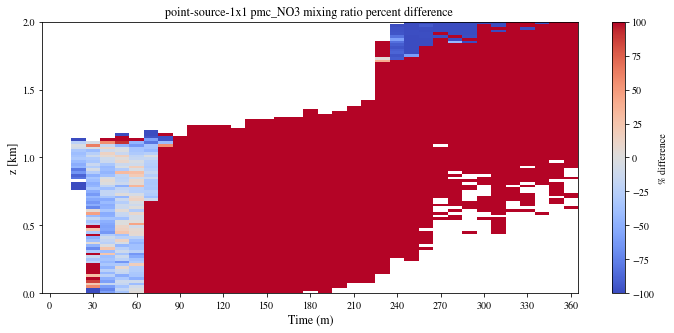

In [27]:
variable = 'pmc_NO3'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-100, vmax=100, 
                   mixingratio=True)


In [ ]:
def plotVarPercentDiffContour(scenario, variable, vmin=None, vmax=None, mixingratio=False, skip_t0=False, **kwargs):
    
    rel_diff = calculateVarPercentDiff(scenario, variable, mixingratio, skip_t0)
    
    ax = kwargs.get('ax', None)
    cmap = kwargs.get('cmap', None)
    if not cmap:
        cmap = plt.cm.coolwarm
    else:
        cmap = plt.get_cmap(cmap)
    
    if not ax:
        print('setting ax')
        fig, ax  = plt.subplots(1,1, figsize=(12,5))
    cs = ax.contourf(rel_diff.T, cmap=cmap, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(cs, label=f'{variable} percent difference', ax=ax)

    ax.set_xlabel('Time (mins)', fontsize=12)
    ax.set_ylabel('z [km]', fontsize=12)
    ax.set_xticks(np.linspace(0, Archive.n_times-1, 13))
    ax.set_xticklabels(5*np.linspace(0, Archive.n_times-1, 13))
    ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
    ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
    if mixingratio:
        mixingratio_str = 'mixing ratio '
    else:
        mixingratio_str = ''
    ax.set_title(f'{scenario} {variable} {mixingratio_str}percent difference ')
    contourmax = kwargs.get('contour_max', 15)
    contourmin = kwargs.get('contour_min', -15)
    ncontours = kwargs.get('n_contours', 9)
    contour_levels = [x for x in np.linspace(contourmin,contourmax, ncontours) if x!= 0]
    CS = ax.contour(rel_diff.T, levels=contour_levels, cmap='gist_gray_r')
    ax.clabel(CS, inline=True, fontsize=13)
    plt.tight_layout()

In [ ]:
scenario = 'point-source-1x1'
plotVarPercentDiffContour(scenario, variable, vmin=-8, vmax=8, 
                   mixingratio=True,contour_max=8, contour_min=-8, n_contours=7,#ax=ax[1], 
                   cmap='coolwarm')

In [ ]:
fig, ax  = plt.subplots(2,1, figsize=(12,8))
variable = 'ccn_006'
                          
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiffContour(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, contour_max=15, contour_min=-15, n_contours=7, ax=ax[0], cmap='coolwarm')

scenario = 'point-source-10x10'
plotVarPercentDiffContour(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True,contour_max=15, contour_min=-15, n_contours=7,ax=ax[1], cmap='coolwarm')

In [ ]:
variable = 'oh'
                        
scenario = 'point-source-1x1'
plotNSHPercentDiff(scenario, variable, vmin=-1000, vmax=1000)

In [ ]:
variable = 'oh'
                        
scenario = 'point-source-10x10-tchem60'
plotNSHPercentDiff(scenario, variable, vmin=-1000, vmax=1000)

In [ ]:
variable = 'oh'
                        
scenario = 'point-source-1x1'
plotZT(scenario, variable, vmin=5e-7, vmax=2e-6, lognorm=True)

In [ ]:
variable = 'oh'
                        
scenario = 'point-source-10x10-tchem60'
plotZT(scenario, variable, vmin=5e-7, vmax=2e-6, lognorm=True)

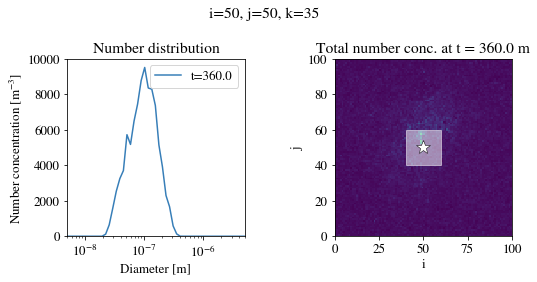

In [17]:
scenario = 'point-source-1x1'
i,j,k = 50, 50, 35
plotNumberDist(scenario, i, j, k, times=[36], 
               ylims=(0, 10000), cmap='Set1',
               local_binning=10)

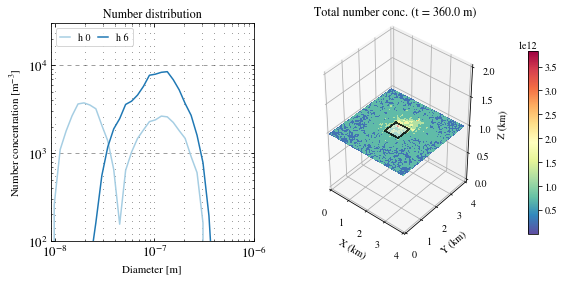

In [7]:
scenario = 'point-source-1x1'
i,j,k = 50, 50, 50
dist_type = 'num'
plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                      dist_cmap='Paired', dist_cmap_norm_range=(0,.15),
                      times = [0, 36],
                      xlims=(9e-9, 1e-6),
                      ylims=(100, 30000), yscale='log',
                      field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                      #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                      local_binning=8, subset_marker='.')